In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats

%pylab inline

import os
import json


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
def getCitiBikeCSV(datestring):
    import os
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

('Downloading', '201502')
file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [6]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
##Extracting hours
time = lambda hour:1 if int(hour.split()[1].split(':')[0]) >6 & int(hour.split()[1].split(':')[0])<18 else 0

df['time'] = df.starttime.apply(time)

In [8]:
df['dayduration'] = df['tripduration'][(df['time'] == 1)]
df['nduration'] = df['tripduration'][(df['time'] == 0)]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,dayduration,nduration
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN,801.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,NaN,379.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,NaN,2474.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,NaN,818.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,NaN,544.0


In [9]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,time,dayduration,nduration
count,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,194663.000000,196930.000000,196930.000000,189854.000000,7076.000000
mean,649.383207,438.669949,40.735784,-73.990074,438.540695,40.735530,-73.990391,18120.012278,1975.288031,1.156203,0.964068,651.771614,585.300594
std,873.231710,321.320871,0.018569,0.011522,321.595789,0.018480,0.011508,2074.916613,11.734009,0.393946,0.186120,861.720804,1137.667139
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14530.000000,1899.000000,0.000000,0.000000,60.000000,60.000000
25%,340.000000,307.000000,40.723684,-73.997901,307.000000,40.723627,-73.998102,16338.000000,NaN,1.000000,1.000000,NaN,NaN
50%,507.000000,417.000000,40.737815,-73.990093,415.000000,40.737262,-73.990697,18089.000000,NaN,1.000000,1.000000,NaN,NaN
75%,764.000000,491.000000,40.750380,-73.981854,491.000000,40.750200,-73.981923,19886.000000,NaN,1.000000,1.000000,NaN,NaN
max,43016.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,1.000000,43016.000000,42801.000000


In [10]:
# dropping NaN values
df['dayduration'].dropna(inplace= True)
df['nduration'].dropna(inplace= True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,dayduration,nduration
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN,801.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,NaN,379.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,NaN,2474.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,NaN,818.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,NaN,544.0


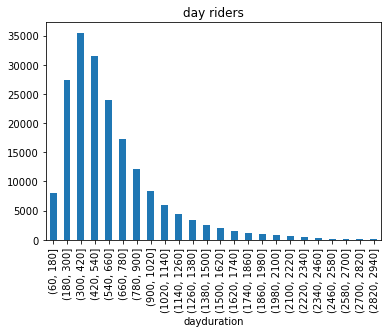

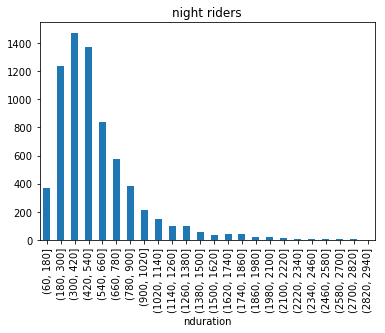

In [11]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3000, 120)
axD = df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = df.nduration.groupby(pd.cut(df.nduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders");

              count_nonzero
dayduration                
(60, 180]          0.009802
(180, 300]         0.040495
(300, 420]         0.061853
(420, 540]         0.089498
(540, 660]         0.081238
(660, 780]         0.071370
(780, 900]         0.062178
(900, 1020]        0.047760
(1020, 1140]       0.037129
(1140, 1260]       0.027093
(1260, 1380]       0.022725
(1380, 1500]       0.017242
(1500, 1620]       0.011462
(1620, 1740]       0.008656
(1740, 1860]       0.008228
(1860, 1980]       0.006382
(1980, 2100]       0.005074
(2100, 2220]       0.003711
(2220, 2340]       0.002613
(2340, 2460]       0.001685
(2460, 2580]       0.000946
(2580, 2700]       0.000555
(2700, 2820]       0.000350
(2820, 2940]       0.000000


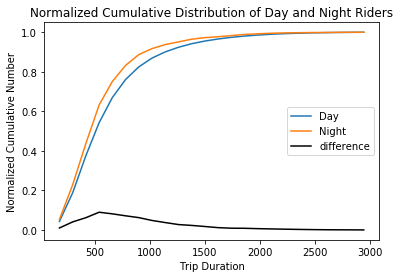

In [12]:
csDay=df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).cumsum()

csNight=df.nduration.groupby(pd.cut(df.nduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDay / csDay.max()-csNight / csNight.max()))

pl.plot(bins[:-1] + 120, csDay / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 120, csNight / csNight.max(), label = "Night")
pl.plot(bins[:-1] + 120, np.sqrt(csNight / csNight.max() - csDay / csDay.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.title("Normalized Cumulative Distribution of Day and Night Riders")
pl.legend()


lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [13]:
ks = scipy.stats.ks_2samp(df.dayduration, df.nduration)
print (ks)

Ks_2sampResult(statistic=0.09210929885158875, pvalue=7.6258756629360055e-51)


**  FILL IN THE CELL BELOW!**

 The KS statistic is 0.09210929885158875, which
mean distance between the cumulative distribution function of the day and the night riders is very small. Since the KS 2-sample test's null hypothesis is that the 2 samples are the same, and that specific null hypothesis can only be rejected if the statistic is greater than the value of $c(\alpha)$.
Since $0.092109298851588758 <  1.36$ (the critical value at 0.05 $\alpha$), we cannot reject the null hypothesis of the scipy.stats.ks_2samp that the 2 distributions are the same.




The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [14]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



H0: The correlation between day and night riders is most likely 0

In [15]:
x, y = df.dayduration, df.nduration
sample_size = min(len(x[~pd.isnull(x)]), len(y[~pd.isnull(y)])) / 200
x = x.sample(int(sample_size)).values
y = y.sample(int(sample_size)).values

In [16]:
Ppearson=scipy.stats.pearsonr(x,y)
print(Ppearson)

(-0.21058233062033965, 0.22465238951529629)


P value shows that there is no significant correlation between the day and night bikers

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [20]:
Pspear=scipy.stats.spearmanr(x, y)
print(Pspear)

SpearmanrResult(correlation=-0.21166911868130145, pvalue=0.2222139814569988)


There is no strong correlation as given by the above result, but there is a small correlation even if it is not 0. Since the p value is less than 0.05, the null hypothesis can be rejected.

# Part 2

In [22]:
datestring = '201503'
getCitiBikeCSV(datestring)

('Downloading', '201503')
file in place, you can continue


In [23]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2['date'] = pd.to_datetime(df2['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [24]:
dFull=pd.concat([df,df2])

dFull.head()

,bikeid,birth year,date,dayduration,end station id,end station latitude,end station longitude,end station name,gender,nduration,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,time,tripduration,usertype
0,17131,1978.0,2015-02-01 00:00:00,NaN,423,40.765849,-73.986905,W 54 St & 9 Ave,2,801.0,521,40.750450,-73.994811,8 Ave & W 31 St,2/1/2015 0:00,2/1/2015 0:14,0.0,801,Subscriber
1,21289,1993.0,2015-02-01 00:00:00,NaN,504,40.732219,-73.981656,1 Ave & E 15 St,1,379.0,497,40.737050,-73.990093,E 17 St & Broadway,2/1/2015 0:00,2/1/2015 0:07,0.0,379,Subscriber
2,18903,1969.0,2015-02-01 00:01:00,NaN,127,40.731724,-74.006744,Barrow St & Hudson St,2,2474.0,281,40.764397,-73.973715,Grand Army Plaza & Central Park S,2/1/2015 0:01,2/1/2015 0:42,0.0,2474,Subscriber
3,21044,1985.0,2015-02-01 00:01:00,NaN,505,40.749013,-73.988484,6 Ave & W 33 St,2,818.0,2004,40.724399,-74.004704,6 Ave & Broome St,2/1/2015 0:01,2/1/2015 0:15,0.0,818,Subscriber
4,19868,1957.0,2015-02-01 00:01:00,NaN,83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,1,544.0,323,40.692362,-73.986317,Lawrence St & Willoughby St,2/1/2015 0:01,2/1/2015 0:10,0.0,544,Subscriber


Null Hypothesis

$H_0$: The difference between the age of Manhattan and Brooklyn bikers is 0

$\alpha$ = 0.05

In [25]:
def borough(coordinate):
    lat, long = coordinate
    if (lat <= 40.698215) and (long >= -73.970755):
        return 1
    else:
        return 0
    
dFull['Borough'] = dFull[['start station latitude', 'start station longitude']].apply(borough, axis=1)
dFull.head()

,bikeid,birth year,date,dayduration,end station id,end station latitude,end station longitude,end station name,gender,nduration,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,time,tripduration,usertype,Borough
0,17131,1978.0,2015-02-01 00:00:00,NaN,423,40.765849,-73.986905,W 54 St & 9 Ave,2,801.0,521,40.750450,-73.994811,8 Ave & W 31 St,2/1/2015 0:00,2/1/2015 0:14,0.0,801,Subscriber,0
1,21289,1993.0,2015-02-01 00:00:00,NaN,504,40.732219,-73.981656,1 Ave & E 15 St,1,379.0,497,40.737050,-73.990093,E 17 St & Broadway,2/1/2015 0:00,2/1/2015 0:07,0.0,379,Subscriber,0
2,18903,1969.0,2015-02-01 00:01:00,NaN,127,40.731724,-74.006744,Barrow St & Hudson St,2,2474.0,281,40.764397,-73.973715,Grand Army Plaza & Central Park S,2/1/2015 0:01,2/1/2015 0:42,0.0,2474,Subscriber,0
3,21044,1985.0,2015-02-01 00:01:00,NaN,505,40.749013,-73.988484,6 Ave & W 33 St,2,818.0,2004,40.724399,-74.004704,6 Ave & Broome St,2/1/2015 0:01,2/1/2015 0:15,0.0,818,Subscriber,0
4,19868,1957.0,2015-02-01 00:01:00,NaN,83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,1,544.0,323,40.692362,-73.986317,Lawrence St & Willoughby St,2/1/2015 0:01,2/1/2015 0:10,0.0,544,Subscriber,0


In [26]:
dFull.describe()


,bikeid,birth year,dayduration,end station id,end station latitude,end station longitude,gender,nduration,start station id,start station latitude,start station longitude,time,tripduration,Borough
count,538756.000000,523636.000000,189854.000000,538756.000000,538756.000000,538756.000000,538756.000000,7076.000000,538756.000000,538756.000000,538756.000000,196930.000000,5.387560e+05,538756.000000
mean,18080.648264,1975.291621,651.771614,437.371511,40.735484,-73.990451,1.150101,585.300594,437.227350,40.735717,-73.990157,0.964068,7.032712e+02,0.013253
std,2081.807595,11.719812,861.720804,321.210895,0.018774,0.011739,0.429114,1137.667139,320.372061,0.018838,0.011716,0.186120,2.486018e+03,0.114355
min,14529.000000,1899.000000,60.000000,72.000000,40.646768,-74.017134,0.000000,60.000000,72.000000,40.646768,-74.017134,0.000000,6.000000e+01,0.000000
25%,16309.000000,NaN,NaN,307.000000,40.722992,-73.998842,1.000000,NaN,307.000000,40.722992,-73.998102,NaN,3.480000e+02,0.000000
50%,18058.000000,NaN,NaN,412.000000,40.737262,-73.990617,1.000000,NaN,416.000000,40.737815,-73.990093,NaN,5.260000e+02,0.000000
75%,19842.000000,NaN,NaN,490.000000,40.750200,-73.981918,1.000000,NaN,490.000000,40.750450,-73.981854,NaN,8.120000e+02,0.000000
max,21760.000000,1999.000000,43016.000000,3002.000000,40.771522,-73.950048,2.000000,42801.000000,3002.000000,40.771522,-73.950048,1.000000,1.007614e+06,1.000000


In [27]:
dFull.columns


Index([u'bikeid', u'birth year', u'date', u'dayduration', u'end station id',
       u'end station latitude', u'end station longitude', u'end station name',
       u'gender', u'nduration', u'start station id', u'start station latitude',
       u'start station longitude', u'start station name', u'starttime',
       u'stoptime', u'time', u'tripduration', u'usertype', u'Borough'],
      dtype='object')

In [28]:
dFull['DOB']=2015- dFull['birth year']


In [29]:
dFull.head()


,bikeid,birth year,date,dayduration,end station id,end station latitude,end station longitude,end station name,gender,nduration,...,start station latitude,start station longitude,start station name,starttime,stoptime,time,tripduration,usertype,Borough,DOB
0,17131,1978.0,2015-02-01 00:00:00,NaN,423,40.765849,-73.986905,W 54 St & 9 Ave,2,801.0,...,40.750450,-73.994811,8 Ave & W 31 St,2/1/2015 0:00,2/1/2015 0:14,0.0,801,Subscriber,0,37.0
1,21289,1993.0,2015-02-01 00:00:00,NaN,504,40.732219,-73.981656,1 Ave & E 15 St,1,379.0,...,40.737050,-73.990093,E 17 St & Broadway,2/1/2015 0:00,2/1/2015 0:07,0.0,379,Subscriber,0,22.0
2,18903,1969.0,2015-02-01 00:01:00,NaN,127,40.731724,-74.006744,Barrow St & Hudson St,2,2474.0,...,40.764397,-73.973715,Grand Army Plaza & Central Park S,2/1/2015 0:01,2/1/2015 0:42,0.0,2474,Subscriber,0,46.0
3,21044,1985.0,2015-02-01 00:01:00,NaN,505,40.749013,-73.988484,6 Ave & W 33 St,2,818.0,...,40.724399,-74.004704,6 Ave & Broome St,2/1/2015 0:01,2/1/2015 0:15,0.0,818,Subscriber,0,30.0
4,19868,1957.0,2015-02-01 00:01:00,NaN,83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,1,544.0,...,40.692362,-73.986317,Lawrence St & Willoughby St,2/1/2015 0:01,2/1/2015 0:10,0.0,544,Subscriber,0,58.0


In [30]:
manAge = dFull.DOB[dFull["Borough"] == 1]
bklAge= dFull.DOB[dFull["Borough"] == 0]


manAge = manAge.dropna()

bklAge = bklAge.dropna()

In [31]:
MAge = np.asarray(manAge)
BAge = np.asarray(bklAge)

In [32]:
brooklyn_sample = np.random.choice(BAge, size = 6890, replace = False)


In [33]:
manhattan_array = sorted(MAge)
brooklyn_array = sorted(brooklyn_sample)

# KS Test

In [34]:
ks = scipy.stats.ks_2samp(manhattan_array, brooklyn_array)


In [35]:
print(ks)


Ks_2sampResult(statistic=0.13686502177068355, pvalue=1.0383753738193438e-56)


In order to reject the null hypothesis, at the value of significance level 0.05, the value of statistics should be greater than 1.36. Since 0.13686502177068355<1.36, we cannot reject the null hypothesis.


# Pearson's Test


In [36]:
Ppear=scipy.stats.pearsonr(manhattan_array,brooklyn_array)


In [37]:
print(Ppear)


(0.99206958225526654, 0.0)


As the correlation coefficient is very close to 1, we can say that the relationship between the rider age group in Manhattan and Brooklyn is linear. Also since the p-value is less than 0.05, we can reject our null hypothesis

# Spearman's Test

In [38]:
Pspear=scipy.stats.spearmanr(manhattan_array,brooklyn_array)


In [39]:
print(Pspear)


SpearmanrResult(correlation=0.99891073410125208, pvalue=0.0)


In this test also, the correlation coefficient is very close to 1, so its safe to say that the relationship between the rider age group in Manhattan and Brooklyn is linear. Also as p-value is less than 0.05, we can reject the null hypothesis